In [19]:
# pip install tweepy
# pip install configparser
# pip install pandas
# pip install snscrape

In [10]:
import tweepy
import configparser
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter

In [11]:
# Read Configs
config = configparser.ConfigParser()
config.read('config/config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [12]:
# Authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [13]:
# # Home Timeline
# public_tweets = api.home_timeline()
# columns = ['time', 'user', 'tweet']
# data = []
# for tweet in public_tweets:
#     data.append([tweet.created_at, tweet.user.screen_name, tweet.text])
    
# df = pd.DataFrame(data, columns=columns)
# print(df)

# # dataframe.to_csv('filename')

In [23]:
# Search Parameters
screen_name = "thegrandblooms"
follow_list = []
follow_id_list = []
follower_limit = 1000
  
# Populating lists with follower names and IDs using twitter API
for page in tweepy.Cursor(api.get_followers, screen_name=screen_name, count=200).items(follower_limit):
#     print(page.screen_name)
    follow_list.append(page.screen_name)
    follow_id_list.append(page.id)

In [94]:
follow_df.to_csv('followers.csv')

In [79]:
follow_df = pd.DataFrame(follow_list)
samples = follow_df
# samples[0].tolist()

['scrmshw',
 'spiralcocoon',
 'innerstitial',
 'irafeierabend',
 'Entheogenist',
 'myfitnesspa',
 'nosilverv',
 'Zenftmaster',
 'AlLee320',
 'blisstweeting',
 'Bored_Anterieur',
 'chenchenLiu11',
 'adityadevsood',
 'danica_boyce',
 'jambarree',
 'ReneeSolana',
 'RomeoStevens76',
 'carmenleelau',
 'gospelofchange',
 'CarstenStolz',
 'EduQuinn',
 '_Nyunyunyu',
 'astralpajamas',
 'JLBornstein',
 'progcpl',
 'Hugh_Davison',
 'KaderEly',
 'ask_1more_why',
 'aliozgurarslan',
 'LaurenUba',
 'wclausen93',
 'willrossthomas',
 'KarlHeinzHasliP',
 'smallkewlhuman',
 'fallfromspace',
 '4dahalibut',
 'ricvolpe',
 'mayel2b',
 'lancew',
 'rafathebuilder',
 'lizzie12s',
 'strangelinalet',
 'Damnrules1',
 'Thaumautomaton',
 'witnessingastro',
 'DzambhalaHODL',
 'cekaur',
 'aoouoia',
 'celia18whitfiel',
 'searedmilk',
 'AgotaDubi',
 'kharmabum',
 'goontheguru',
 'GHenrickson',
 'harry_turton',
 'oystersmilin',
 'elizabethholmie',
 'Philonius4',
 'hari_mohanraj',
 'callmeartisttt',
 'Chetan93681',
 'flux

In [80]:
limit = 100
columns = ['creation_time', 'user', 'tweet', 'retweets', 'favorites', 'followers', 'lists']
total_tweets = []

for follower in samples[0].tolist():
    query = (f'from:{follower} min_retweets:5 lang:en since:2020-01-01')
    tweets = []
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    #     print(vars(tweet))
    #     break
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, 
                           tweet.user.username, 
            #                   tweet.inReplyToUser, 
                           tweet.content,
                           tweet.retweetCount,
                           tweet.likeCount,
                           tweet.user.followersCount,
                           tweet.user.listedCount])
    total_tweets.extend(tweets)

df = pd.DataFrame(total_tweets, columns=columns)

In [109]:
# Saving to CSV
df.to_csv('viral.csv')

In [92]:
df.sort_values('retweets', ascending=False) # .style.set_properties(**{'text-align': 'left'})

,creation_time,user,tweet,retweets,favorites,followers,lists
2551,2022-05-27 13:09:38+00:00,generativist,imagine being buried and then seeing a rat wit...,26923,215347,19877,347
1050,2021-12-15 07:24:35+00:00,profeshkitten,"If you’re so smart, why aren’t you kind?",22951,105003,1453,22
960,2022-07-29 01:32:17+00:00,keta_mean_,i'm so annoyed that 'vermilion' is a shade of ...,11510,144459,3363,22
956,2022-08-09 00:15:13+00:00,keta_mean_,“i can fix him” “i can make him worse”// okay ...,3319,18884,3363,22
1311,2022-08-04 06:35:13+00:00,alyssamvance,"The ""traditional family"" was never very tradit...",2097,13301,3619,39
...,...,...,...,...,...,...,...
1182,2021-04-17 22:24:13+00:00,_StevenFan,Get off twitter and enjoy the rest of the day,2,67,2517,50
2224,2021-01-30 22:22:56+00:00,1Kebron,Day 1\n\nDid a @freeCodeCamp challenge called ...,2,3,55,5
2617,2021-09-30 13:25:10+00:00,generativist,there are two ways to communicate your persona...,2,12,19877,347
2686,2022-04-27 03:50:51+00:00,startuployalist,"Stunning, earnest, and utterly heartfelt. Scre...",1,8,5809,253


<AxesSubplot:>

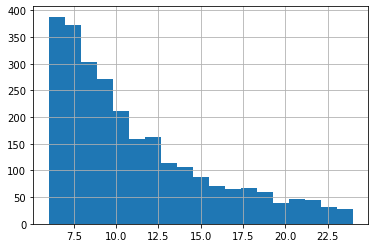

In [104]:
df['retweets'].loc[df['retweets']<25].loc[df['retweets']>5].hist(bins=19)

## Grabbing a sample of tweets, irrespective of virality

In [105]:
samples = follow_df.sample(300)

In [106]:
limit = 100
columns = ['creation_time', 'user', 'tweet', 'retweets', 'favorites', 'followers', 'lists']
total_tweets = []

for follower in samples[0].tolist():
    query = (f'from:{follower} lang:en since:2020-01-01 -filter:replies')
    tweets = []
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    #     print(vars(tweet))
    #     break
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, 
                           tweet.user.username, 
            #                   tweet.inReplyToUser, 
                           tweet.content,
                           tweet.retweetCount,
                           tweet.likeCount,
                           tweet.user.followersCount,
                           tweet.user.listedCount])
    total_tweets.extend(tweets)

df = pd.DataFrame(total_tweets, columns=columns)

In [107]:
df

,creation_time,user,tweet,retweets,favorites,followers,lists
0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7
1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7
2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7
3,2022-09-14 07:28:49+00:00,goannaburrows,Today a news editor told me that 'biodiversity...,0,8,566,7
4,2022-09-13 03:40:24+00:00,goannaburrows,Writing productivity tip: type in a heinous fo...,0,8,566,7
...,...,...,...,...,...,...,...
14942,2022-05-05 17:15:01+00:00,mufeedvh,+200 stars in two days out of nowhere?! What's...,0,5,462,4
14943,2021-12-20 08:00:16+00:00,mufeedvh,"I open-sourced moonwalk, a Red Teaming tool to...",7,11,462,4
14944,2021-12-14 22:25:18+00:00,mufeedvh,I open-sourced log4jail - A firewall reverse p...,17,58,462,4
14945,2020-05-13 16:49:16+00:00,mufeedvh,today was an epic day.,0,6,462,4


In [108]:
# Saving sample to samples.csv
df.to_csv('samples.csv')

In [13]:
# # user tweets
# user = 'thegrandblooms'
# limit = 300
# tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

# # Dataframe of tweets
# columns = ['creation_time', 'user', 'reply_to_user', 'tweet']
# data = []
# for tweet in tweets:
#     data.append([tweet.created_at, tweet.user.screen_name, tweet.in_reply_to_screen_name, tweet.full_text])
# #     print(tweet.full_text)
# df = pd.DataFrame(data, columns=columns)

In [24]:
# Search Tweets
# Keyword concepts: 'new paper x' 'rumor' 'must read'
# keywords = 'new paper machine learning'
# limit = 200
# tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode='extended', lang='en').items(limit)

# # Dataframe of tweets
# columns = ['creation_time', 'user', 'replyee', 'tweet', 'retweets', 'favorites', 'followers', 'lists']
# data = []
# for tweet in tweets:
#     data.append([tweet.created_at, 
#                  tweet.user.screen_name, 
#                  tweet.in_reply_to_screen_name, 
#                  tweet.full_text,
#                  tweet.retweet_count,
#                  tweet.favorite_count,
#                  tweet.user.followers_count,
#                  tweet.user.listed_count
#                 ])
# df = pd.DataFrame(data, columns=columns)

In [25]:
# df

In [26]:
# df.sort_values('favorites')

In [67]:
query = 'new paper machine learning min_retweets:5 lang:en until:2022-01-01 since:2018-01-01 -filter:replies'
limit = 1000
columns = ['creation_time', 'user', 'tweet', 'retweets', 'favorites', 'followers', 'lists']
tweets = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, 
                 tweet.user.username, 
#                  tweet.inReplyToUser, 
                 tweet.content,
                 tweet.retweetCount,
                 tweet.likeCount,
                 tweet.user.followersCount,
                 tweet.user.listedCount])

df = pd.DataFrame(tweets, columns=columns)

In [ ]:
# Save to CSV
df.to_csv('top_viral_ML_papers')

In [45]:
# for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     print(vars(tweet))
#     break

{'url': 'https://twitter.com/trajanov/status/1572973388779651073', 'date': datetime.datetime(2022, 9, 22, 15, 37, 34, tzinfo=datetime.timezone.utc), 'content': 'Using #MachineLearning in #Finance raises ethical issues that need to be carefully examined. Find how in our new paper "Ethically Responsible Machine Learning in Fintech," published in @IEEEAccess. Great collaboration between @FINKIedu and @METBU  https://t.co/QiYw357mNh', 'renderedContent': 'Using #MachineLearning in #Finance raises ethical issues that need to be carefully examined. Find how in our new paper "Ethically Responsible Machine Learning in Fintech," published in @IEEEAccess. Great collaboration between @FINKIedu and @METBU  ieeexplore.ieee.org/document/98698…', 'id': 1572973388779651073, 'user': User(username='trajanov', id=41584321, displayname='Dimitar Trajanov', description='PhD, Professor@FINKIEdu, Data Science and Semantic Web Enthusiast', rawDescription='PhD, Professor@FINKIEdu, Data Science and Semantic Web E

In [69]:
df.sort_values('retweets')

,creation_time,user,tweet,retweets,favorites,followers,lists
103,2021-02-18 06:11:58+00:00,Big_IDIA,A new paper using Machine Learning to classify...,3,7,629,2
225,2020-02-20 07:26:20+00:00,muellerputz,"We have a new paper published in JNE: ""Using m...",4,11,529,0
23,2021-10-08 14:23:30+00:00,junwhanlee89,How can we predict the storm surge from tropic...,4,26,189,0
175,2020-08-17 23:44:59+00:00,BoyongPark1,New paper out in Human Brain Mapping!! “Whole‐...,4,13,170,5
186,2020-07-16 13:40:11+00:00,yimmieg,Our new paper on how a machine learning classi...,4,29,2151,26
...,...,...,...,...,...,...,...
67,2021-05-06 16:33:48+00:00,tegmark,I'm excited that our new paper on machine lear...,221,1344,78724,1361
150,2020-10-20 06:54:56+00:00,ChristophMolnar,We have a new paper on arxiv 🎉🎉\nInterpretable...,224,883,15530,331
275,2019-06-26 08:45:46+00:00,shakir_za,Exited to share our new paper: 'Monte Carlo Gr...,321,1049,40931,900
7,2021-12-01 16:23:32+00:00,DeepMind,A new paper in @Nature details how machine lea...,646,2625,646540,6740


In [90]:
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\8D\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
# Tokenizer Parameters
basic_token_pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(basic_token_pattern)

# Natural Language Processing & Lemmatization
clean_df = df
clean_df['tweet'] = clean_df['tweet'].str.lower()
clean_df["text_tokenized"] = clean_df["tweet"].apply(tokenizer.tokenize)
clean_df.style.set_properties(**{'text-align': 'left'}) # show full tweets

,creation_time,user,tweet,retweets,favorites,followers,lists,text_tokenized,text_without_stopwords
0,2021-12-28 09:32:52+00:00,AgustinMIbanez,"new paper: the #conneegtome for dementia multicenter research: from experiment/acquisition/preprocessing harmonization, to composite connectivity metrics (scalp/source) and multi-feature machine learning to boost the predictive strength of #eeg 👉 https://t.co/dgpfzwn7ah https://t.co/z5jsnofbty",10,33,16949,25,"['new', 'paper', 'the', 'conneegtome', 'for', 'dementia', 'multicenter', 'research', 'from', 'experiment', 'acquisition', 'preprocessing', 'harmonization', 'to', 'composite', 'connectivity', 'metrics', 'scalp', 'source', 'and', 'multi', 'feature', 'machine', 'learning', 'to', 'boost', 'the', 'predictive', 'strength', 'of', 'eeg', 'https', 'co', 'dgpfzwn7ah', 'https', 'co', 'z5jsnofbty']","['conneegtome', 'dementia', 'multicenter', 'research', 'experiment', 'acquisition', 'preprocessing', 'harmonization', 'composite', 'connectivity', 'metrics', 'scalp', 'source', 'multi', 'feature', 'boost', 'predictive', 'strength', 'eeg', 'dgpfzwn7ah', 'z5jsnofbty']"
1,2021-12-28 00:27:26+00:00,erezyoeli,we're using machine learning to improve #tuberculosis treatment support on @keheala. new paper with j boutilier and @jonasoddur: https://t.co/6hd3w0tcm3 here's the rundown. 🧵,7,26,2260,60,"['we', 're', 'using', 'machine', 'learning', 'to', 'improve', 'tuberculosis', 'treatment', 'support', 'on', 'keheala', 'new', 'paper', 'with', 'boutilier', 'and', 'jonasoddur', 'https', 'co', '6hd3w0tcm3', 'here', 'the', 'rundown']","['improve', 'tuberculosis', 'treatment', 'support', 'keheala', 'boutilier', 'jonasoddur', '6hd3w0tcm3', 'rundown']"
2,2021-12-20 16:29:15+00:00,PolicyR,new paper: this paper discusses a socio-technical typology of bias in data-driven machine learning and artificial intelligence systems and argues that clear distinctions between concepts of bias are necessary for analysis and critique by paola lopez https://t.co/bifag3czcx https://t.co/rt2ifqm6mk,8,32,8916,301,"['new', 'paper', 'this', 'paper', 'discusses', 'socio', 'technical', 'typology', 'of', 'bias', 'in', 'data', 'driven', 'machine', 'learning', 'and', 'artificial', 'intelligence', 'systems', 'and', 'argues', 'that', 'clear', 'distinctions', 'between', 'concepts', 'of', 'bias', 'are', 'necessary', 'for', 'analysis', 'and', 'critique', 'by', 'paola', 'lopez', 'https', 'co', 'bifag3czcx', 'https', 'co', 'rt2ifqm6mk']","['discusses', 'socio', 'technical', 'typology', 'driven', 'artificial', 'intelligence', 'systems', 'argues', 'clear', 'distinctions', 'concepts', 'necessary', 'analysis', 'critique', 'paola', 'lopez', 'bifag3czcx', 'rt2ifqm6mk']"
3,2021-12-13 08:04:49+00:00,GumaJordi,really happy for my new paper out in ssm-population health: “what influences individual perception of health? using machine learning to disentangle self-perceived health” 👇 https://t.co/fukiwifktj @demosocupf @politiquesupf,8,57,289,0,"['really', 'happy', 'for', 'my', 'new', 'paper', 'out', 'in', 'ssm', 'population', 'health', 'what', 'influences', 'individual', 'perception', 'of', 'health', 'using', 'machine', 'learning', 'to', 'disentangle', 'self', 'perceived', 'health', 'https', 'co', 'fukiwifktj', 'demosocupf', 'politiquesupf']","['really', 'happy', 'ssm', 'population', 'health', 'influences', 'individual', 'perception', 'health', 'disentangle', 'self', 'perceived', 'health', 'fukiwifktj', 'demosocupf', 'politiquesupf']"
4,2021-12-10 12:42:18+00:00,melissa_a_penny,it’s challenging to calibrate individual-based models to multiple data sources! check out our new paper on machine learning+emulator based bayesian optimization approaches https://t.co/lrnwwcxmvh improving #malaria & #covid19 models supporting decision-making. 🧵 https://t.co/xhqw7r7uqk,18,58,677,7,"['it', 'challenging', 'to', 'calibrate', 'individual', 'based', 'models', 'to', 'multiple', 'data', 'sources', 'check', 'out', 'our', 'new', 'paper', 'on', 'machine', 'learning', 'emulator', '

In [101]:
# Remove Stopwords Function
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [152]:
# Defining Stopword List & Removing Stopwords
stopwords_list = stopwords.words('english')
stopwords_list.extend(['co', 'https', 'using', 'new', 'learning', 'paper', 'machine', 'data', 'use', 
                       'amp', 'machinelearning', 'check', 'models', 'ai', 'ml', 'used', 'published', 
                       'today', 'based', 'model', 'algorithms', 'predict', 'prediction', 'bias'])
clean_df["text_without_stopwords"] = clean_df["text_tokenized"].apply(remove_stopwords)

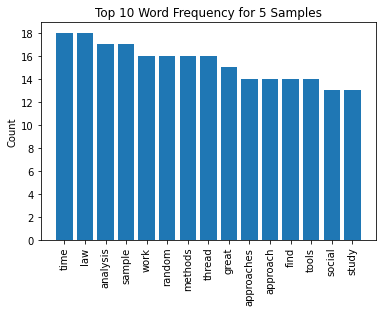

In [153]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def visualize_top_15(freq_dist, title):

    # Extract data for plotting
    top_15 = list(zip(*freq_dist.most_common(15)))
    tokens = top_15[0]
    counts = top_15[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
sample_freq_dist = FreqDist(clean_df["text_without_stopwords"].explode())
visualize_top_15(sample_freq_dist, "Top 10 Word Frequency for 5 Samples")

In [125]:
clean_df.drop(['text_tokenized'], axis=1)

,creation_time,user,tweet,retweets,favorites,followers,lists,text_without_stopwords
0,2021-12-28 09:32:52+00:00,AgustinMIbanez,new paper: the #conneegtome for dementia multi...,10,33,16949,25,"[conneegtome, dementia, multicenter, research,..."
1,2021-12-28 00:27:26+00:00,erezyoeli,we're using machine learning to improve #tuber...,7,26,2260,60,"[improve, tuberculosis, treatment, support, ke..."
2,2021-12-20 16:29:15+00:00,PolicyR,new paper: this paper discusses a socio-techni...,8,32,8916,301,"[discusses, socio, technical, typology, driven..."
3,2021-12-13 08:04:49+00:00,GumaJordi,really happy for my new paper out in ssm-popul...,8,57,289,0,"[really, happy, ssm, population, health, influ..."
4,2021-12-10 12:42:18+00:00,melissa_a_penny,it’s challenging to calibrate individual-based...,18,58,677,7,"[challenging, calibrate, individual, multiple,..."
...,...,...,...,...,...,...,...,...
358,2018-01-16 19:28:14+00:00,fermatslibrary,new paper\npersonalized nutrition by predictio...,50,200,615366,3520,"[personalized, nutrition, glycemic, responses,..."
359,2018-01-16 07:34:33+00:00,danilobzdok,new paper from judea pearl on #machinelearning...,35,50,6288,237,"[judea, pearl, achieve, human, level, intellig..."
360,2018-01-15 04:52:26+00:00,rbhar90,judea pearl's new paper on the limitations of ...,23,82,9839,275,"[judea, pearl, limitations, namely, reason, ca..."
361,2018-01-10 18:33:56+00:00,BanfieldLab,new paper out in msystems- machine learning le...,29,50,7690,76,"[msystems, leveraging, genomes, metagenomes, i..."


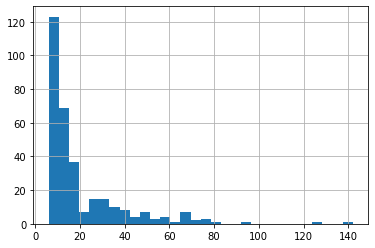

In [154]:
# Hist dist of retweets
clean_df['retweets'].loc[clean_df['retweets']>5].loc[clean_df['retweets']<200].hist(bins=30);

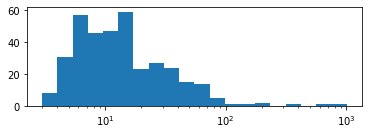

In [162]:
# Log hist for fun
# plt.subplot(211)
hist, bins, _ = plt.hist(clean_df['retweets'], bins=20)

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(clean_df['retweets'], bins=logbins)
plt.xscale('log')
plt.show()

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=300,
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
vectorized = tfidf.fit_transform(clean_df["tweet"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(vectorized, columns=tfidf.get_feature_names())

C:\Users\8D\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,46hfcd3hce,accepted,access,adversarial,age,agencies,al,alert,algorithm,also,...,uses,via,volume,walks,way,well,whole,without,work,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.458542,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Clustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Perform cross-validation
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

knn_baseline_log_loss

In [ ]:
# Twitter Scraping of top cluster terms - 'edit distance clustering'
